# ML Practical 7

## Questions

### 1. Motivation and characteristics of k nearest neighbours

**Answer**
k-NN is motivated by the idea that similar data points should have similar labels (in classification) or similar target values (in regression). It assumes that data points close to each other in feature space are likely to belong to the same class or have similar numerical values.


- k-NN is a simple and interpretable algorithm.
- It's non-parametric, meaning it doesn't make strong assumptions about the underlying data distribution.
- It's lazy, as it doesn't require explicit training; it memorizes the training data.
- It's sensitive to the choice of distance metric and the value of k.


### 2. How do kNN classification and regression work?

k-NN **classification**,
- The algorithm predicts the class label of a new data point by considering the labels of its k nearest neighbors in the training data.
- It calculates distances between the new data point and all training data points using a chosen distance measure.
- The k closest data points (neighbors) are determined based on these distances.
- The algorithm then predicts the class label of the new data point based on a **majority vote among the classes** of the k neighbors.

k-NN **regression**,
- The algorithm predicts the numerical value of a new data point by considering the values of its k nearest neighbors in the training data.
- It calculates distances between the new data point and all training data points using a chosen distance measure.
- The k closest data points (neighbors) are determined based on these distances.
- The algorithm then predicts the value of the new data point as the **mean (or weighted mean) of the target values** of the k neighbors.


### 3. What are distance measures and how do they affect prediction

- Distance measures are mathematical formulas used to quantify the similarity or dissimilarity between data points.
- The choice of distance measure impacts how the algorithm calculates the distance between data points.
- Different distance measures, such as Euclidean, Manhattan, and Mahalanobis, can result in different predictions.
- The choice of distance measure should be made based on the characteristics of the data and the problem at hand.

### 4. 1D cases and higher dimensions
- k-NN can be applied in 1D cases (one feature) and higher dimensions (multiple features).
- In 1D, the distance between data points is simply a numerical difference.
- In higher dimensions, distances are calculated using more complex formulas like the Euclidean distance, which considers differences in all dimensions.

### 5. How to choose the best k value?
- The choice of the value of k is critical in k-NN.
- A small k (e.g., 1 or 3) can lead to a more flexible, possibly noisy model with high variance.
- A large k (e.g., 10 or 20) can lead to a smoother, less noisy model with higher bias.
- The best k value depends on the dataset and should be selected through techniques like cross-validation or grid search, optimizing for performance metrics like accuracy or mean squared error.

### 6. Weighted NN and kernel regression idea
- **Weighted Nearest Neighbors**: Assigning different weights to neighbors based on their similarity to the query point. Similar neighbors have higher weights, influencing predictions more.
- **Kernel Regression**: A variation of k-NN where kernel functions are used to compute similarities and serve as weights for neighbors. Gaussian kernels are commonly used for this purpose.

### 7. What makes an approach non-parametric?
- Non-parametric approaches like k-NN do not make explicit assumptions about the functional form of the underlying data distribution.
- They do not have a fixed set of parameters that need to be learned from the data.
- Instead, they rely on the data itself to determine the model complexity, which can grow with the size of the dataset.
- Non-parametric approaches are flexible and can capture complex relationships in the data but may require more computational resources as the dataset size increases.

## Practical


In [1]:
#%% Preamble: packages 
import numpy as np
import os
import pandas as pd

# iris dataset
from sklearn import datasets

import matplotlib as mpl
import matplotlib.pyplot as plt

# kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

# PCA
from sklearn.decomposition import PCA

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# other
import timeit
import tracemalloc


## Section 1: Knn classification

In [2]:
# make the code output stable across runs
np.random.seed(42)

# to plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [3]:
# kNN Classification

# set up iris data
# use sepal width, petal width to predict species
iris = datasets.load_iris()
X = iris["data"][:, (1, 3)]  # sepal width, petal width
y = iris["target"]

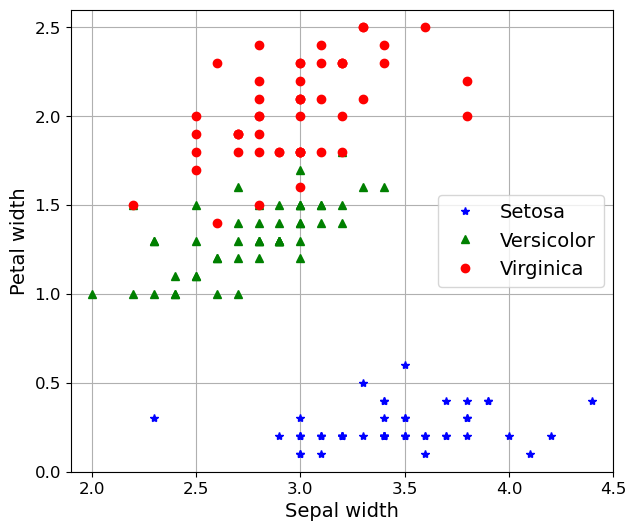

In [4]:
# Define a plot function

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b*", label="Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Virginica")

    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("Sepal width", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center right", fontsize=14)

# Just plot the data    
plt.figure(figsize=(7,6))
plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.show()

In [5]:
# define plot decision boundary (class regions) function

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

### k = 1

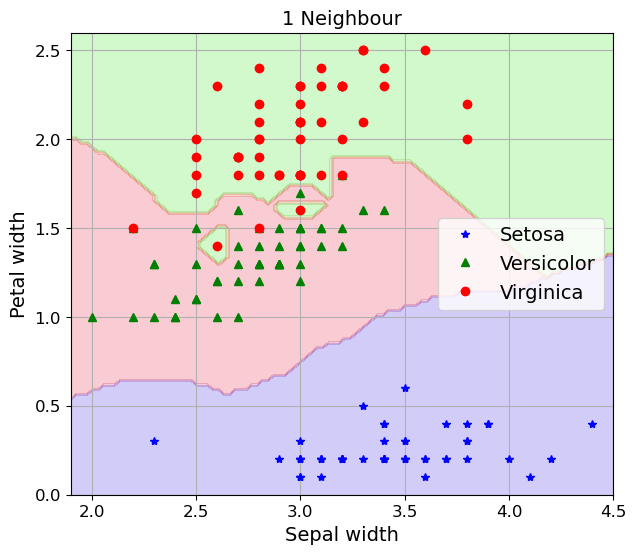

In [6]:
k = 1
knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X,y)

# plot the predictions and decision boundaries
plt.figure(figsize=(7, 6))
plot_predictions(knn_clf, [1.9, 4.5, 0.0, 2.6])
plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.title("{} Neighbour".format(k),  fontsize=14)
plt.show()

### k = 3

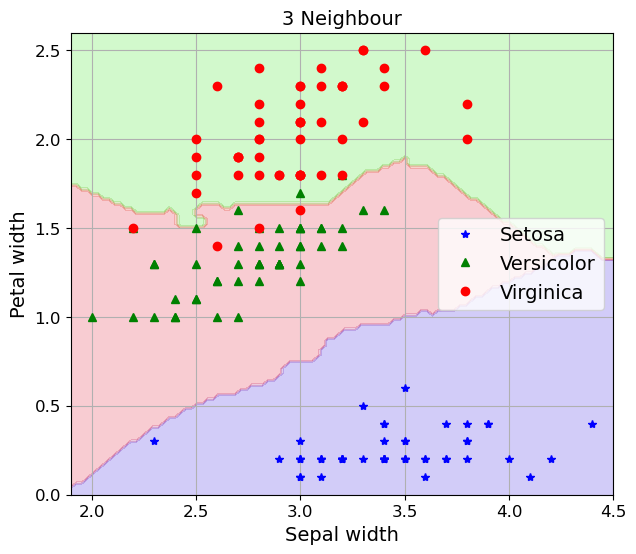

In [7]:
k = 3
knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X,y)

# plot the predictions and decision boundaries
plt.figure(figsize=(7, 6))
plot_predictions(knn_clf, [1.9, 4.5, 0.0, 2.6])
plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.title("{} Neighbour".format(k),  fontsize=14)
plt.show()

### k = 9

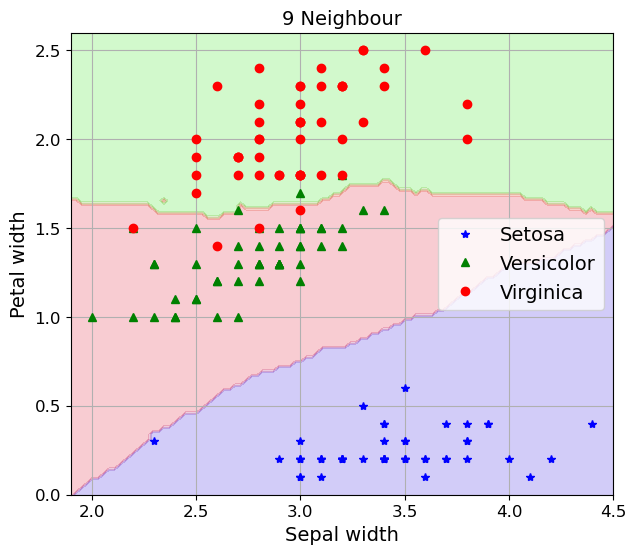

In [8]:
k = 9
knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X,y)

# plot the predictions and decision boundaries
plt.figure(figsize=(7, 6))
plot_predictions(knn_clf, [1.9, 4.5, 0.0, 2.6])
plot_dataset(X, y, [1.9, 4.5, 0.0, 2.6])
plt.title("{} Neighbour".format(k),  fontsize=14)
plt.show()

## Section 2: KNN regression (kernel smoothing)

In [9]:
# Generate random data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

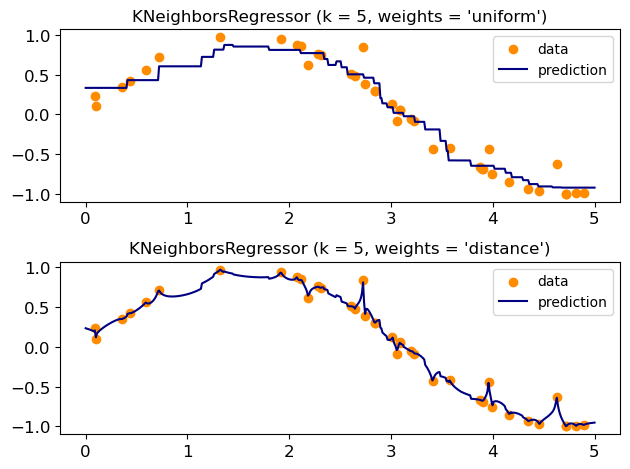

In [10]:
# Choose k
n_neighbors = 5

# kNN Regression
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## Section 3: Use kNN to predict hand written digits

In [11]:
# load the data
mtrain = pd.read_csv("mnist_train.csv", header=0)
mtest = pd.read_csv("mnist_test.csv", header=0)

print('size of training data: ', mtrain.shape)
print('size of test data: ', mtest.shape)

size of training data:  (60000, 785)
size of test data:  (10000, 785)


### a) Create subsets of 2 digits from both the training and test data (pick two digits, e.g. 3 and 8). Classify the test data using the training set, with k = 3

In [12]:
# pick digits "3" and "8"
digit1 = 3
digit2 = 8

In [27]:
# choose the row locations of digits 3 OR 8
mtrain2 = mtrain.loc[(mtrain['label'] == digit1) | (mtrain['label'] == digit2)]
mtest2 = mtest.loc[(mtest['label'] == digit1) | (mtest['label'] == digit2) ]

# set up the data: 
X = mtrain2.drop(mtrain2.columns[0], axis=1).values
y = (mtrain2['label'] == digit2).astype(np.float64).values   

# # Take the first image and plot it
# idx = 100 # You can change it to see others
# img = np.c_[X.iloc[idx,:]].reshape(28,28)
# plt.imshow(img, cmap="Greys")
# plt.title(f'sample label is {y.iloc[idx].astype(np.float64)}')
# plt.show()

# set up test data:
X_test = mtest2.drop(mtest2.columns[0], axis=1).values
y_test = (mtest2['label'] == digit2).astype(np.float64).values

In [28]:
# Note tracemalloc is used to check memore usage
start = timeit.default_timer()
tracemalloc.start()
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
y_pred = knn_clf.predict(X_test)

print('Time to run the process: ', timeit.default_timer() - start)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Time to run the process:  26.411919377998856
Current memory usage is 424.037332MB; Peak was 816.984251MB


In [30]:
# classification accuracy
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_test, y_pred)*100)

[[1006   17]
 [   4  957]]
98.94153225806451


### (b) Pick a misclassified example. How do the nearest neighbours look like?

In [49]:
idxMisclassification = np.where((y_test == y_pred) == False)
idxMisclassification[0]

array([ 109,  111,  160,  161,  261,  267,  363,  376,  422,  440,  479,
        488,  645,  709,  726,  949,  970, 1175, 1187, 1496, 1976])

The misclassified data has the label:  8


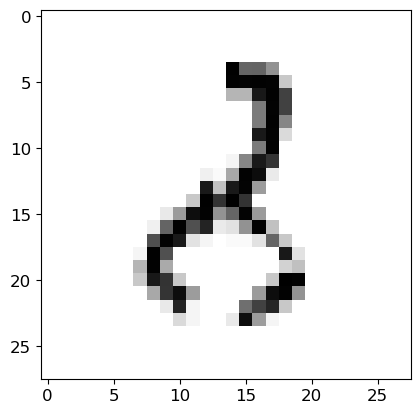

In [54]:
# Pick a misclassified sample and find its neighbors
# choose index 109
neigh_dist, neigh_idx = knn_clf.kneighbors(np.c_[X_test[109,:]].reshape(1,-1),3, return_distance = True)
neigh_idx

# The misclassified data
labels = [digit1, digit2]
print("The misclassified data has the label: ",
      labels[(y_test[109]).astype(np.int64)])

img = np.c_[X_test[109,:]].reshape(28,28)
plt.imshow(img, cmap = "Greys")
plt.show()


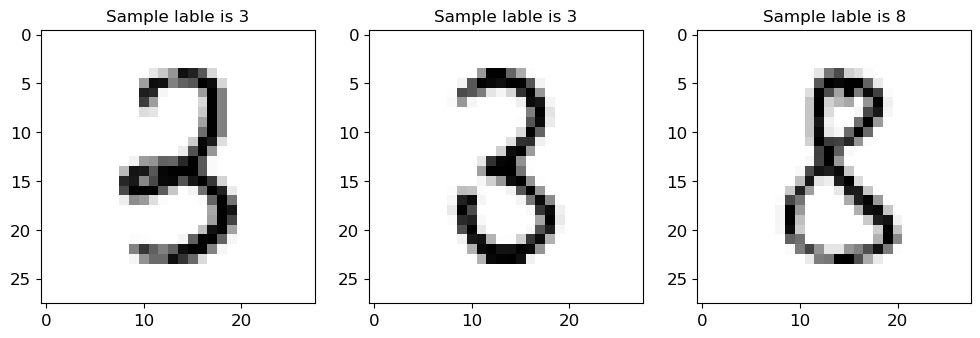

In [56]:
# The neighbouring points
plt.figure(figsize = (12,4))
for idx, i in np.ndenumerate(neigh_idx[0]):
    plt.subplot(1,3, idx[0]+1)
    img = np.c_[X[i,:]].reshape(28,28)
    plt.imshow(img, cmap = "Greys")
    plt.title(f'Sample lable is {labels[(y[i]).astype(np.int64)]}')

plt.show()

### (c) Use the training data to create training and validation sets. Use the validation set to find the best value for k. Use the k you selected, compute the error on the test set. How does it compare with results from part (a)?

k = 1
Time to run the classification: 39.291seconds
k = 2
Time to run the classification: 38.917seconds
k = 3
Time to run the classification: 38.978seconds
k = 4
Time to run the classification: 39.041seconds
k = 5
Time to run the classification: 39.063seconds
k = 6
Time to run the classification: 39.071seconds
k = 7
Time to run the classification: 39.06seconds
k = 8
Time to run the classification: 39.057seconds
k = 9
Time to run the classification: 39.076seconds
k = 10
Time to run the classification: 39.04seconds
k = 11
Time to run the classification: 39.037seconds


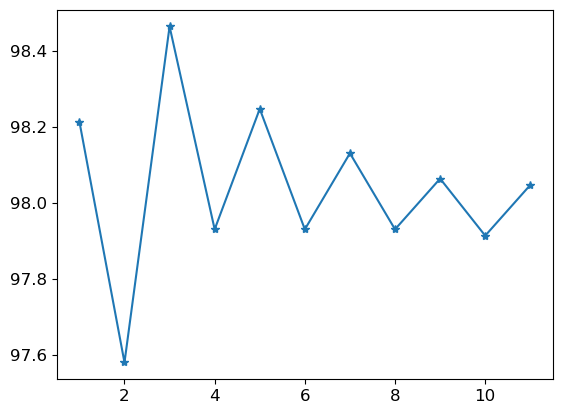

In [65]:
# Create 50/50 train and validation split on training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5,random_state=42)

# make a list of k values
k_values = np.arange(1, 12, 1)
results_acc = []

for k in k_values:
    print(f'k = {k}')
    start = timeit.default_timer()
    knn_clf = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

    y_pred = knn_clf.predict(X_val)
    print(f'Time to run the classification: {round(timeit.default_timer() - start, 3)}seconds')

    # Calculate accuracy
    acc = accuracy_score(y_val, y_pred)*100
    results_acc.append(acc)

plt.figure
plt.plot(k_values, results_acc, '-*')
plt.show()

The k with the highest accuracy is k = 3

### (d) Apply the selected k to classify all digits of the test set

In [70]:
# Classify all digits of the test set
tracemalloc.start()
start = timeit.default_timer()

# setup the data

X = mtrain.drop(mtrain.columns[0], axis = 1).values
y = (mtrain['label']).astype(np.float64)


X_test = mtest2.drop(mtest.columns[0], axis=1).values
y_test = (mtest2['label']).astype(np.float64)

knn_clf = KNeighborsClassifier(n_neighbors = 3).fit(X,y)
y_pred = knn_clf.predict(X_test)

print(f'Time to run the process:  {round(timeit.default_timer() - start, 3)} seconds')
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

print(f'Accuracy on the test data using the new subset is: {round(accuracy_score(y_test, y_pred)*100,2)} %')

Time to run the process:  132.489 seconds
Current memory usage is 1155.873766MB; Peak was 3073.118861MB
Accuracy on the test data using the new subset is: 95.26 %


# Extra - Diabetes data set

In [71]:
#%% ########### Section ?: Use KNN to predict diabetes ###########
# We use sklearn data
# First 10 columns are numeric predictive values
# The last one is blood sugar level we predict. 
# See the following website for the data description
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
# Partial code available below. 

In [72]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Mean squared error: 8667.10
Coefficient of determination: -0.79


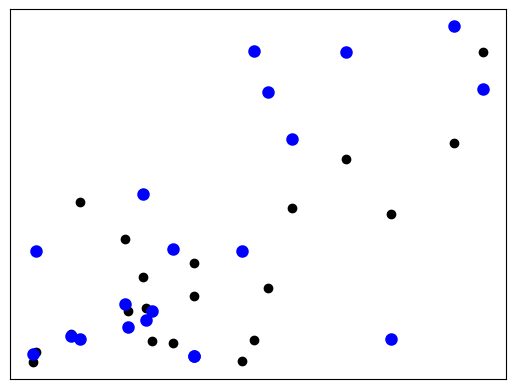

In [73]:

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = neighbors.KNeighborsRegressor(1, weights='distance')

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.scatter(diabetes_X_test[:,0], diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
